# Data Cleaning

### Reading the Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import plotly.express as px
import pickle as pkl

dataset = "male_players (legacy)_23"
# dataset = "female_players_23"
df = pd.read_csv('Data/'+dataset+'.csv')
print(len(df))

161583


C:\Users\BoodyBeeh\AppData\Local\Temp\ipykernel_6308\2129525028.py:11: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/'+dataset+'.csv')


### Taking a look at the dataset

In [28]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


### Handling Nulls

<Axes: >

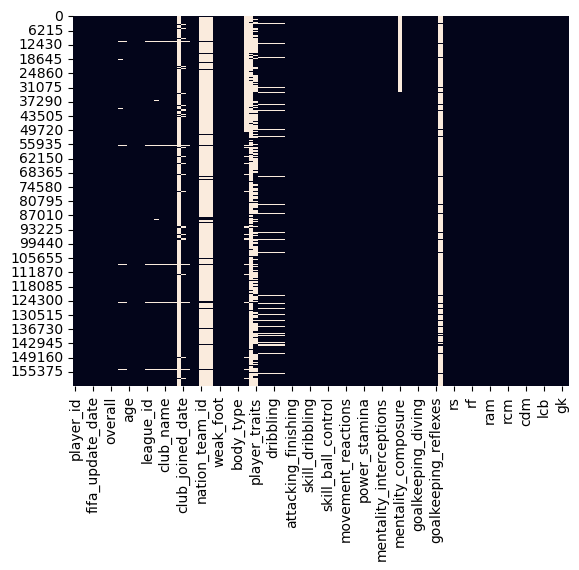

In [30]:
sns.heatmap(df.isnull(), cbar = False)
# Data has lots of missing values

In [31]:
# Total number of nulls = 1218702 in male_players (legacy)_23.csv
# Total number of nulls = 2883528 in female_players_23.csv
df.isnull().sum().sum()

1218702

In [32]:
# Nulls in each column
nulls = df.isnull().sum() 
print(nulls[nulls > 0])

value_eur                           2053
wage_eur                            1761
league_id                           1773
league_name                         1773
league_level                        2717
club_team_id                        1773
club_name                           1773
club_position                       1773
club_jersey_number                  1773
club_loaned_from                  152045
club_joined_date                   11311
club_contract_valid_until_year      1773
nation_team_id                    152267
nation_position                   152267
nation_jersey_number              152267
release_clause_eur                 57961
player_tags                       148920
player_traits                      88433
pace                               17969
shooting                           17969
passing                            17969
dribbling                          17969
defending                          17969
physic                             17969
mentality_compos

In [33]:
# Showing it as percentages
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_loaned_from                  94.097151
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
nation_team_id                    94.234542
nation_position                   94.234542
nation_jersey_number              94.234542
release_clause_eur                35.870729
player_tags                       92.163161
player_traits                     54.729148
pace                              11.120601
shooting                          11.120601
passing                           11.120601
dribbling                         11.120601
defending                       

In [34]:
# Check nulls in pace, shooting, passing, dribbling, defending, physic
# Check if they are the same rows
print("Number of all nulls:", df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1).sum())
# print("Number of rows:",df[df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1)]['player_positions'].count())
print("Number of any nulls:",df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().any(axis = 1).sum())
# All of them are null in the same rows. So we could drop them

print("Number of goal keepers:", len(df[df['player_positions'] == 'GK']))
# We notice all of them are goal keepers, except 6 in the case of females
# print those 6
df[(df['player_positions'] != 'GK') & df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].isnull().all(axis=1)][['player_id', 'short_name', 'player_positions', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall']]


Number of all nulls: 17969
Number of any nulls: 17969
Number of goal keepers: 17969


,player_id,short_name,player_positions,pace,shooting,passing,dribbling,defending,physic,overall


In [35]:
# Handling a few nulls
'''
11.120601 +  88.879399 = 100
'pace' -----> 'goalkeeping_speed'
'shooting' -----> 'goalkeeping_kicking
'passing' -----> 20
'dribbling' -----> 22
'defending' -----> 14
'physic' -----> 64          # mean instead of min, as GK's aren't that bad
'''
# el goalkeepers lyhom scores msh lel la3eeba el tanya, fa hn-merge el 2 columns basically
df['pace'] = df[['pace', 'goalkeeping_speed']].max(axis = 1)
df['shooting'] = df[['shooting', 'goalkeeping_kicking']].max(axis = 1)

# fy 7agat tanya mne2darsh n3mlha merge, fa hna5od el min aw mean 3la asas en el GK msh byb2a gamed fl 7war dh
df['passing'].fillna(df['passing'].min(), inplace = True)
df['dribbling'].fillna(df['dribbling'].min(), inplace = True)
df['defending'].fillna(df['defending'].min(), inplace = True)
df['physic'].fillna(df['physic'].mean(), inplace = True)

C:\Users\BoodyBeeh\AppData\Local\Temp\ipykernel_6308\3539282510.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passing'].fillna(df['passing'].min(), inplace = True)
C:\Users\BoodyBeeh\AppData\Local\Temp\ipykernel_6308\3539282510.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [36]:
# We can't do this before the previous cell, because we use some of the dropped columns to fill the nulls

# Drop columns with more than 33% missing values
# thresh: minimum number of non-NA values to keep the column
df = df.dropna(thresh = 2 * len(df) / 3, axis = 1)
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
mentality_composure               20.336917
dtype: float64


In [37]:
try:
    # Check nulls in 'league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'
    # Check if they are the same rows, msh rows mo5tlfa
    print("Number of all null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum())
    print("Number of any null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().any(axis = 1).sum())
    # tl3 3adad el rows el kolaha null = 3adad el nulls mn kol column fyhom, y3ny nafs el rows
    # All of them are null in the same rows. So we could drop them without losing much data

    # Calculate percentage of nulls in these columns
    # print(df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum() / len(df) * 100)

    # Drop these empty rows
    df = df.dropna(subset = ['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'])
except:
    print("Only the male dataset needs this")


Number of all null rows: 1773
Number of any null rows: 1773


In [38]:
try:
    # We notice league level has only a few nulls, so we can drop them
    print("Number of nulls in league_level:", df['league_level'].isnull().sum())
    df = df.dropna(subset = ['league_level'])
except:
    print("Only the male dataset needs this")

Number of nulls in league_level: 944


In [39]:
# This has been handled, making this cell obsolete. But it would work for other datasets

# Check nulls in 'gk'
print(df['gk'].isnull().sum())
# Check if there is null in 'gk' and position == goalkeeper
print(df['player_positions'][df['gk'].isnull()].str.contains('GK').sum())
# Some of them are goalkeepers


0
0


In [40]:
# Set df['gk'] nulls to the average of  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'

df.loc[df['gk'].isnull(), 'gk'] = df[df['gk'].isnull()][['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis = 1)

In [41]:
try:
    # See a few rows where 'value_eur' is null
    df[df['value_eur'].isnull()].head()
except:
    print("Only the male dataset needs this")

In [42]:
# get the type of columns that have nulls
df.dtypes[nulls[nulls > 0].index]

value_eur                         float64
wage_eur                          float64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_joined_date                   object
club_contract_valid_until_year    float64
mentality_composure               float64
dtype: object

In [43]:
try:
    # Taking a look at some players
    df['value_eur'].describe()

    # get player with max value
    # df[df['value_eur'] == df['value_eur'].max()]

    # get 5 players with max value
    df.nlargest(5, 'value_eur')
except:
    print("Only the male dataset needs this")

In [44]:
df['mentality_composure'].describe()
# get nulls in 'mentality_composure'
df['mentality_composure'].isnull().sum()

31931

In [45]:
from sklearn.impute import KNNImputer
# Filling the nulls with KNN imputer
# bye7seb KNN w yshoof a2rab nas w ya5od el avg bta3hom
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3)
df['mentality_composure'] = imputer.fit_transform(df[['mentality_composure']])

In [46]:
# print column names of type object
df.select_dtypes(include = 'object').columns

Index(['player_url', 'fifa_update_date', 'short_name', 'long_name',
       'player_positions', 'dob', 'league_name', 'club_name', 'club_position',
       'club_joined_date', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object')

In [47]:
# Checking some columns to see which to drop

# df['player_url']            # drop
# df['long_name']             # drop
# df['fifa_update_date']      # drop
# df['club_joined_date']      # drop
# df['real_face']             # drop
# df['player_face_url']       # drop
# df['dob']                   # drop

# drop the above attributes
try:
    # Males
    df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'club_joined_date', 'real_face', 'player_face_url','dob'])
except:
    # Females
    df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'real_face', 'player_face_url', 'dob'])

In [48]:
# print(df['long_name'].str.split('+').str[0])
# print(df['gk'].isnull().sum())
# get id of some null gk
print(df[df['gk'].isnull()]['player_id'])


Series([], Name: player_id, dtype: int64)


In [49]:
# loop on all the position attrributes and evaluate the cell
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in positions:
    # if it has + or - in it, evaluate the expression
    df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) else x)




In [50]:
# drop null values in 'value_eur' as they are very few, or we can use them for testing
# df = df.dropna(subset = ['value_eur'])

#### By now, the male dataset should have no nulls

In [51]:
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

value_eur    0.179396
dtype: float64


In [52]:
try:
    print("Number of all nulls:", df[['nation_team_id', 'nation_position', 'nation_jersey_number']].iloc[:].isnull().all(axis = 1).sum())
    print("Number of any nulls:",df[['nation_team_id', 'nation_position', 'nation_jersey_number']].iloc[:].isnull().any(axis = 1).sum())
    # All of them are null in the same rows. So we could drop them without losing much data
    df = df.dropna(subset = ['nation_team_id', 'nation_position', 'nation_jersey_number'])
except:
    print("Only the female dataset needs this.")

Only the female dataset needs this.


In [53]:
nulls = df.isnull().sum() 
print(f"There are {nulls[nulls > 0].sum()} nulls out of {len(df)}")
# We can drop them as they are very few
df = df.dropna()

There are 285 nulls out of 158866


In [54]:
# Get number of nulls
if df.isnull().sum().sum() == 0:
    print("No nulls left. EZZZZ")

No nulls left. EZZZZ


### Handling Duplicates

In [55]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

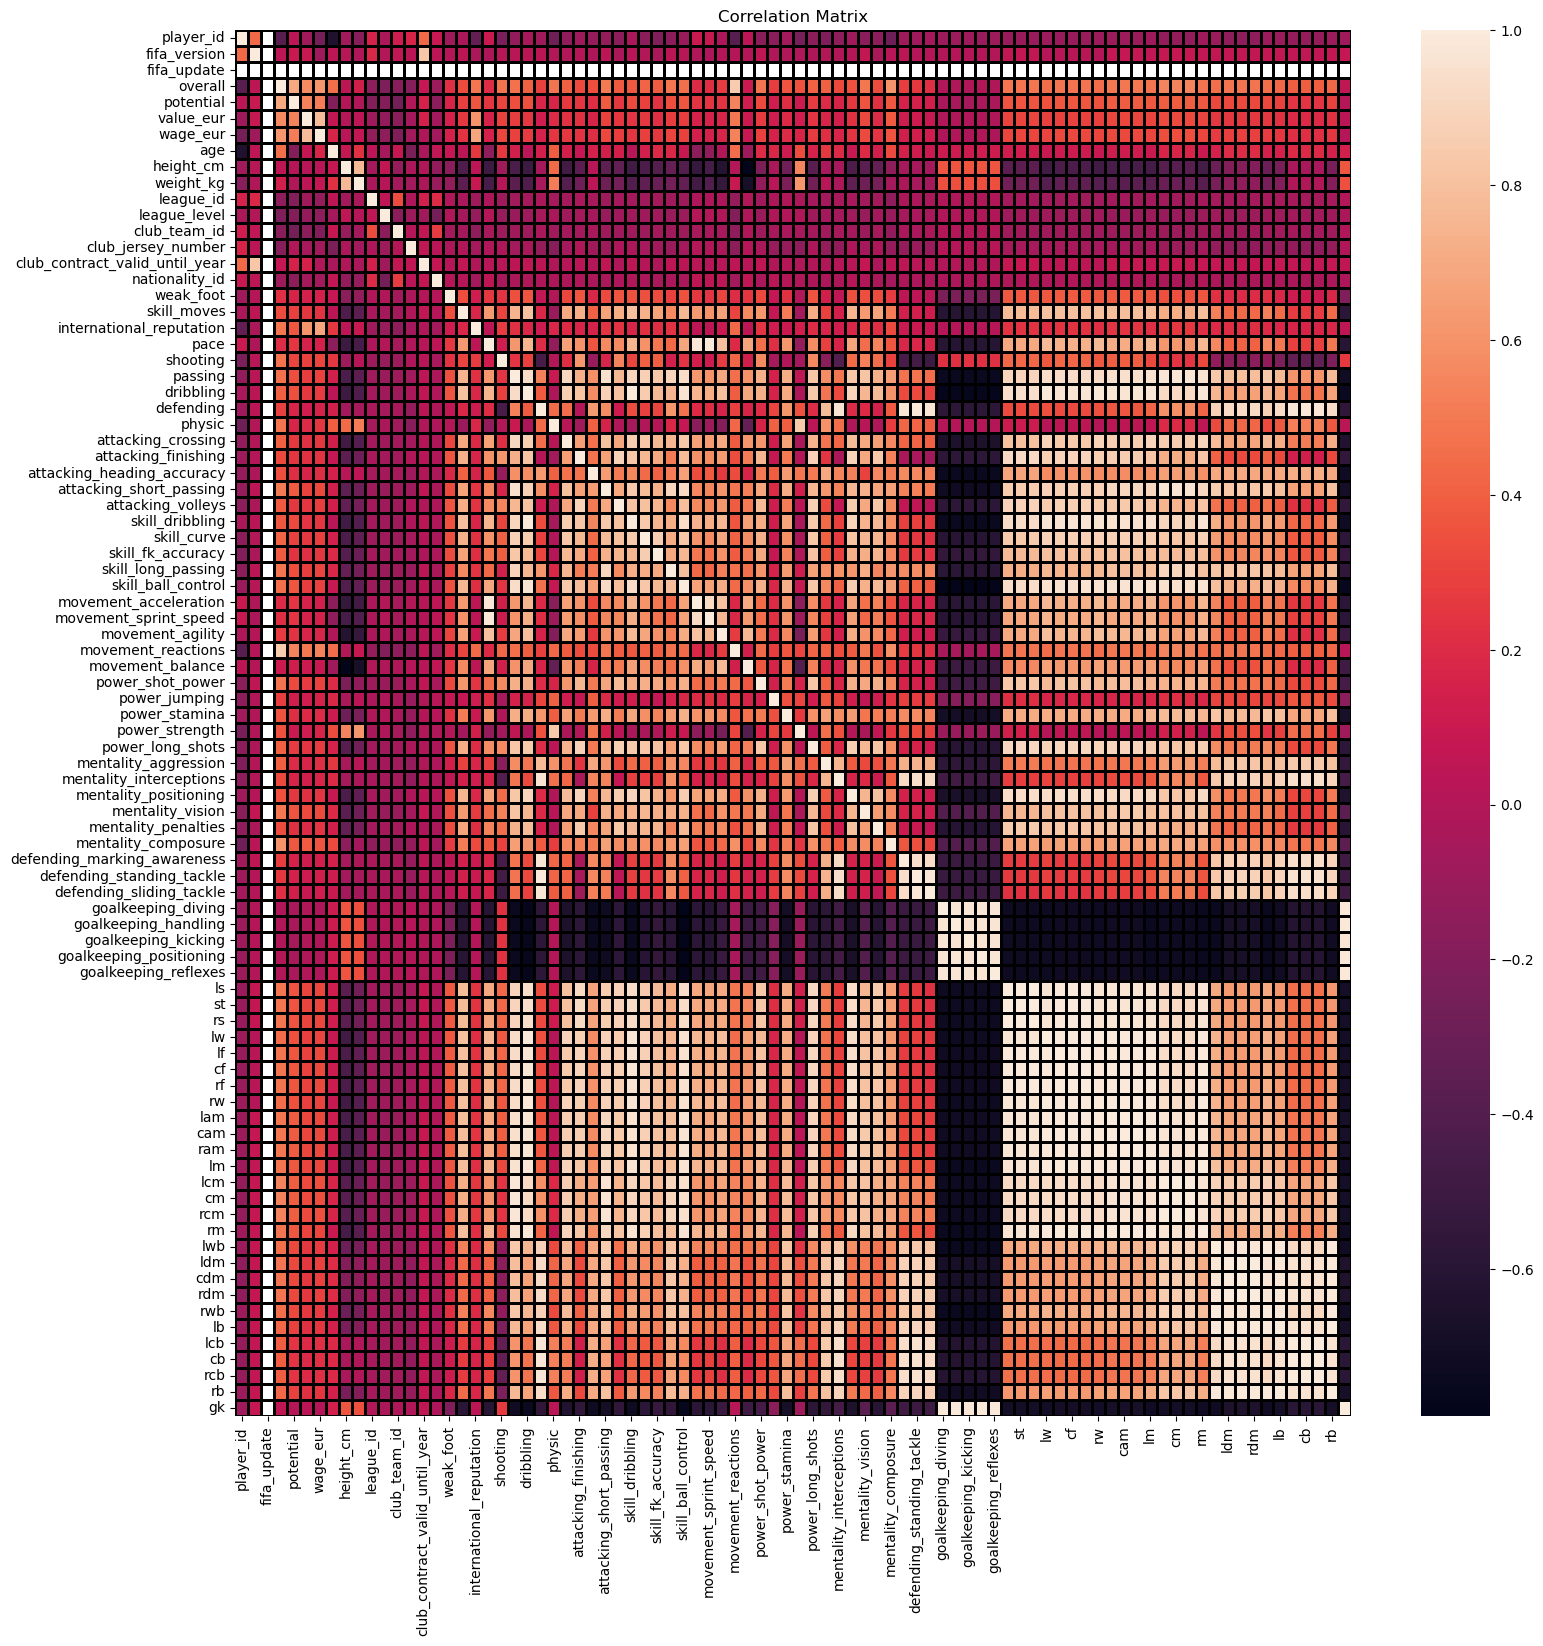

In [56]:
# making a heatmap of the correlation matrix
df2 = df.copy()
# dropping the categorical columns
try:
       df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
              'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
              'body_type'])
except:
       df2 = df2.drop(columns = ['short_name', 'player_positions', 'nationality_name', 'nation_position',
              'preferred_foot', 'work_rate', 'body_type'])

plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(), cbar = True, linewidths=1, linecolor='black')
# sns.heatmap(df2.corr(), annot= False, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

In [57]:
# 'fifa_update', 'fifa_version': Both of these columns are not useful, as they are not related any other column
print(df['fifa_update'].unique())
df = df.drop(columns = ['fifa_update'])
# but we won't drop fifa_version because we use it for analysis
# Notice fifa_update only has value 2 in case of male

[2]


# Preprocessing

In [58]:
df.select_dtypes(include = 'object').columns

Index(['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'],
      dtype='object')

In [59]:
print(df['work_rate'].value_counts(),"\n\n")

# get sum of work_rate counts that start with High, Medium, Low
print("Attack ", end ="")
print(df['work_rate'].str.split('/').str[0].value_counts(),"\n\n")
print("Defend ", end ="")
print(df['work_rate'].str.split('/').str[1].value_counts())


work_rate
Medium/Medium    87220
High/Medium      27362
Medium/High      14227
High/High         7774
Medium/Low        7667
High/Low          6322
Low/Medium        3956
Low/High          3731
Low/Low            322
Name: count, dtype: int64 


Attack work_rate
Medium    109114
High       41458
Low         8009
Name: count, dtype: int64 


Defend work_rate
Medium    118538
High       25732
Low        14311
Name: count, dtype: int64


In [60]:
# We can split work rate into 2 columns: Attack and Defend
df['work_rate_attack'] = df['work_rate'].str.split('/').str[0]
df['work_rate_defend'] = df['work_rate'].str.split('/').str[1]

# Drop the original column
df = df.drop(columns = ['work_rate'])

# Get values of the new columns to make sure they are correct
print(df['work_rate_attack'].value_counts(), "\n")
print(df['work_rate_defend'].value_counts())




work_rate_attack
Medium    109114
High       41458
Low         8009
Name: count, dtype: int64 

work_rate_defend
Medium    118538
High       25732
Low        14311
Name: count, dtype: int64


In [61]:
# Now we can one hot encode these columns
# Note that splitting them then one hot encoding them is better than one hot encoding the original column
# this produces 6 columns instead of 9 (linearly dependent (2n) instead of exponentially dependent (n^2))
df = pd.get_dummies(df, columns = ['work_rate_attack', 'work_rate_defend'])
# The types are bool, we can convert them to int
df['work_rate_attack_Low'] = df['work_rate_attack_Low'].astype(int)
df['work_rate_attack_Medium'] = df['work_rate_attack_Medium'].astype(int)
df['work_rate_attack_High'] = df['work_rate_attack_High'].astype(int)
df['work_rate_defend_Low'] = df['work_rate_defend_Low'].astype(int)
df['work_rate_defend_Medium'] = df['work_rate_defend_Medium'].astype(int)
df['work_rate_defend_High'] = df['work_rate_defend_High'].astype(int)




In [62]:
len(df.columns)
# The length of the columns has increased by 5 (6-1)

99

In [63]:
print("Before:", df['body_type'].value_counts())
# No need to look at height here, as there is another column for it
df['body_type'] = df['body_type'].str.split().str[0]
print("\n\nAfter:", df['body_type'].value_counts())

Before: body_type
Normal (170-185)    55664
Lean (170-185)      34554
Normal (185+)       33122
Lean (185+)         16339
Normal (170-)        5497
Stocky (170-185)     5158
Lean (170-)          3718
Stocky (185+)        3188
Stocky (170-)         905
Unique                436
Name: count, dtype: int64


After: body_type
Normal    94283
Lean      54611
Stocky     9251
Unique      436
Name: count, dtype: int64


In [64]:
# One hot encode
df = pd.get_dummies(df, columns = ['body_type'])
df['body_type_Lean'] = df['body_type_Lean'].astype(int)
df['body_type_Normal'] = df['body_type_Normal'].astype(int)
df['body_type_Stocky'] = df['body_type_Stocky'].astype(int)
df['body_type_Unique'] = df['body_type_Unique'].astype(int)


In [65]:
# Change value of left to 0 and right to 1
print(df['preferred_foot'].value_counts(), "\n")
df['preferred_foot'] = df['preferred_foot'].apply(lambda x: 0 if x == 'Left' else 1)
print(df['preferred_foot'].value_counts())

preferred_foot
Right    121380
Left      37201
Name: count, dtype: int64 

preferred_foot
1    121380
0     37201
Name: count, dtype: int64


3ayzeen nb2a n3ml type encoding to some feature

In [66]:
df.describe()

,player_id,fifa_version,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_id,...,work_rate_attack_High,work_rate_attack_Low,work_rate_attack_Medium,work_rate_defend_High,work_rate_defend_Low,work_rate_defend_Medium,body_type_Lean,body_type_Normal,body_type_Stocky,body_type_Unique
count,158581.000000,158581.000000,158581.000000,158581.000000,1.585810e+05,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,...,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000
mean,214706.636987,19.146285,65.656132,70.745657,2.326804e+06,10864.026586,25.067164,181.244020,75.222038,211.266306,...,0.261431,0.050504,0.688065,0.162264,0.090244,0.747492,0.344373,0.594542,0.058336,0.002749
std,34647.755954,2.560845,7.054245,6.265234,6.018702e+06,21977.552623,4.639864,6.748627,7.000115,446.143431,...,0.439416,0.218984,0.463285,0.368694,0.286532,0.434453,0.475165,0.490982,0.234379,0.052363
min,2.000000,15.000000,40.000000,43.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199286.000000,17.000000,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,220715.000000,19.000000,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,56.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,237102.000000,21.000000,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,308.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,271817.000000,23.000000,94.000000,95.000000,1.940000e+08,575000.000000,47.000000,208.000000,110.000000,2149.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158581 entries, 0 to 161582
Columns: 102 entries, player_id to body_type_Unique
dtypes: float64(14), int32(10), int64(72), object(6)
memory usage: 118.6+ MB


In [68]:
# get type of first 50 columns
df.dtypes[:50]

player_id                           int64
fifa_version                        int64
short_name                         object
player_positions                   object
overall                             int64
potential                           int64
value_eur                         float64
wage_eur                          float64
age                                 int64
height_cm                           int64
weight_kg                           int64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_contract_valid_until_year    float64
nationality_id                      int64
nationality_name                   object
preferred_foot                      int64
weak_foot                           int64
skill_moves                       

In [69]:
df.dtypes[49:]

power_strength                   int64
power_long_shots                 int64
mentality_aggression             int64
mentality_interceptions          int64
mentality_positioning            int64
mentality_vision                 int64
mentality_penalties              int64
mentality_composure            float64
defending_marking_awareness      int64
defending_standing_tackle        int64
defending_sliding_tackle         int64
goalkeeping_diving               int64
goalkeeping_handling             int64
goalkeeping_kicking              int64
goalkeeping_positioning          int64
goalkeeping_reflexes             int64
ls                               int64
st                               int64
rs                               int64
lw                               int64
lf                               int64
cf                               int64
rf                               int64
rw                               int64
lam                              int64
cam                      

In [70]:
len(df2.columns)

86

In [71]:
# Saving the dataset
df.to_csv('Data/Preprocessed/Clean_'+dataset+'.csv', index = False)